In [ ]:
! pip install opendatasets

In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/serenaraju/yawn-eye-dataset-new")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: ankitabaishnab
Your Kaggle Key: ··········


100%|██████████| 161M/161M [00:05<00:00, 30.8MB/s]


In [ ]:
labels = os.listdir("/content/yawn-eye-dataset-new/dataset_new/train")

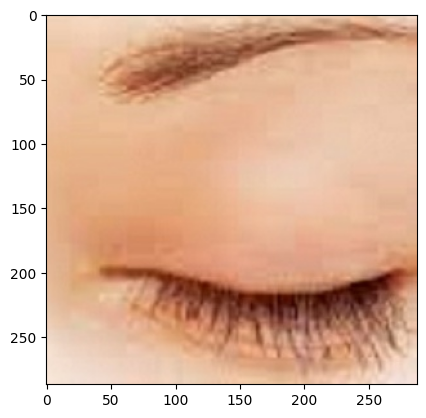

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread("/content/yawn-eye-dataset-new/dataset_new/train/Closed/_100.jpg"))

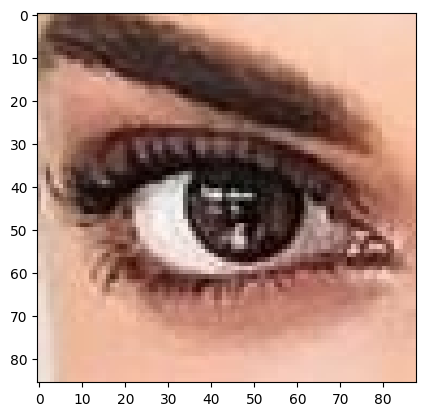

In [ ]:
plt.imshow(plt.imread("/content/yawn-eye-dataset-new/dataset_new/train/Open/_1.jpg"))

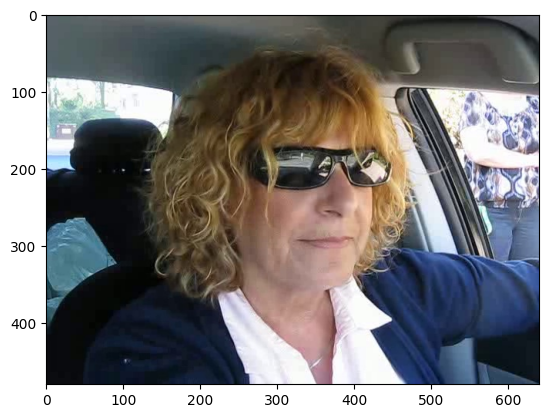

In [ ]:
plt.imshow(plt.imread("/content/yawn-eye-dataset-new/dataset_new/train/no_yawn/1003.jpg"))

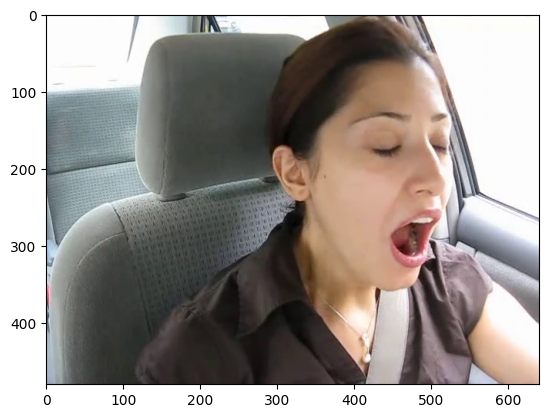

In [ ]:
a=plt.imshow(plt.imread("/content/yawn-eye-dataset-new/dataset_new/train/yawn/1.jpg"))

#####FOR YAWN AND NO YAWN

In [ ]:
def face_for_yawn(direc="/content/yawn-eye-dataset-new/dataset_new/train", face_cas_path="/content/haarcascade_frontalface_default.xml"):
  yaw_no = []
  IMG_SIZE = 145
  categories = ["yawn", "no_yawn"]
  for category in categories:
    path_link = os.path.join(direc, category)
    class_num1 = categories.index(category)
    print(class_num1)
    for image in os.listdir(path_link):
      image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
      face_cascade = cv2.CascadeClassifier(face_cas_path)
      faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
      for (x, y, w, h) in faces:
        img = cv2.rectangle(image_array, (x, y), (x+w, y+h), (0, 255, 0), 2)
        roi_color = img[y:y+h, x:x+w]
        resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
        yaw_no.append([resized_array, class_num1])
  return yaw_no


In [ ]:
yawn_no_yawn = face_for_yawn()

0
1


#####For open and closed eye

In [ ]:
def get_data(dir_path=r"/content/yawn-eye-dataset-new/dataset_new/train", face_cas="/content/haarcascade_frontalface_default.xml"):
  labels = ['Closed', 'Open']
  IMG_SIZE = 145
  data = []
  for label in labels:
    path = os.path.join(dir_path, label)
    class_num = labels.index(label)
    class_num +=2
    print(class_num)
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        data.append([resized_array, class_num])
      except Exception as e:
        print(e)
  return data

In [ ]:
data_train = get_data()

2
3


In [ ]:
def append_data():
  yaw_no = face_for_yawn()
  data = get_data()
  yaw_no.extend(data)
  return np.array(yaw_no)

In [ ]:
new_data = append_data()

0
1
2
3


<ipython-input-13-c00c0b37fa6d>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(yaw_no)


In [ ]:
X = []
y = []

In [ ]:
for feature, label in new_data:
  X.append(feature)
  y.append(label)

In [ ]:
X = np.array(X)
X = X.reshape(-1, 145, 145, 3)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(y)
y = np.array(y)

Train-Test Split

In [ ]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

In [ ]:
len(X_test)

494

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

Data Augmentation

In [ ]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)
train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

Model

In [ ]:
model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(145,145,3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 143, 143, 256)     7168      
                                                                 
 max_pooling2d (MaxPooling2  (None, 71, 71, 256)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 69, 128)       295040    
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 34, 34, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        73792     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 64)        0

In [ ]:
history = model.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator))

Epoch 1/50
36/36 [==============================] - 391s 11s/step - loss: 1.2615 - accuracy: 0.4487 - val_loss: 1.0058 - val_accuracy: 0.5931
Epoch 2/50
36/36 [==============================] - 411s 11s/step - loss: 0.6357 - accuracy: 0.7452 - val_loss: 0.4254 - val_accuracy: 0.7976
Epoch 3/50
36/36 [==============================] - 419s 12s/step - loss: 0.4153 - accuracy: 0.8243 - val_loss: 0.3706 - val_accuracy: 0.8522
Epoch 4/50
36/36 [==============================] - 419s 12s/step - loss: 0.3773 - accuracy: 0.8383 - val_loss: 0.2977 - val_accuracy: 0.8988
Epoch 5/50
36/36 [==============================] - 379s 11s/step - loss: 0.3476 - accuracy: 0.8409 - val_loss: 0.2719 - val_accuracy: 0.8887
Epoch 6/50
36/36 [==============================] - 371s 10s/step - loss: 0.3463 - accuracy: 0.8530 - val_loss: 0.1986 - val_accuracy: 0.9251
Epoch 7/50
36/36 [==============================] - 418s 12s/step - loss: 0.3100 - accuracy: 0.8661 - val_loss: 0.2132 - val_accuracy: 0.9150
Epoch 

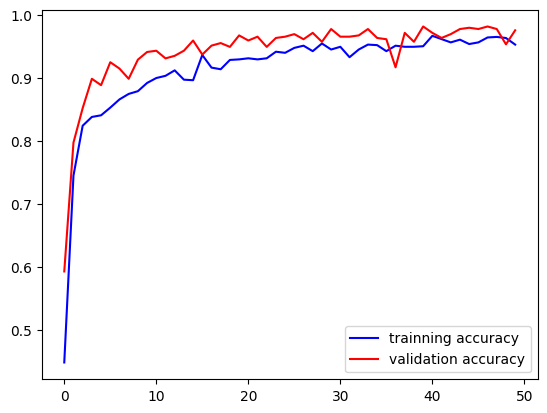

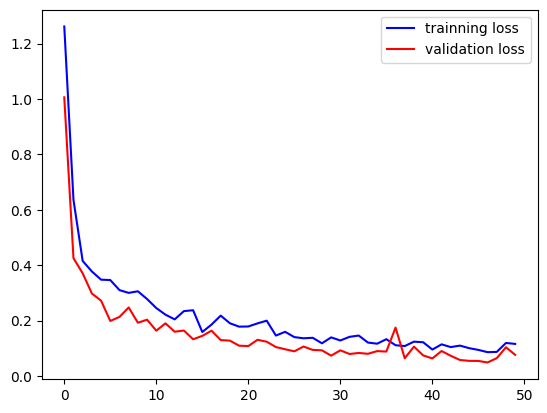

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

save model

In [ ]:
model.save("drowiness_new7.h5")
model.save("drowiness_new7.model")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
prediction = np.argmax(model.predict(X_test), axis=-1)

16/16 [==============================] - 41s 2s/step


Classification Report

In [ ]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1), prediction, target_names=labels_new))

prediction model

In [ ]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]
IMG_SIZE = 145
def prepare(filepath, face_cas="/content/haarcascade_frontalface_default.xml"):
  img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
  img_array = img_array / 255
  resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
  return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)
model = tf.keras.models.load_model("./drowiness_new7.h5")

0-yawn, 1-no_yawn, 2-Closed, 3-Open

In [ ]:
prediction = model.predict([prepare("/content/yawn-eye-dataset-new/dataset_new/test/Closed/_116.jpg")])
np.argmax(prediction)

In [ ]:
prediction = model.predict([prepare("/content/yawn-eye-dataset-new/dataset_new/test/Open/_115.jpg")])
np.argmax(prediction)

1/1 [==============================] - 0s 138ms/step


3